# SA-2022 WEEK 3 GRADED ASSIGNMENT

> Spaceship Titanic

Predict which passengers are transported to an alternate dimension

![](https://www.gannett-cdn.com/-mm-/682bf77435754aee88576469063388a7d8b07c2a/c=0-150-1280-873/local/-/media/2017/02/01/Reno/RGJ/636215634914521096-image001.jpg?width=660&height=373&fit=crop&format=pjpg&auto=webp)


### <b>Description</b>

Welcome to the year 2912, where your data science skills are needed to solve a cosmic mystery. We've received a transmission from four lightyears away and things aren't looking good.

The Spaceship Titanic was an interstellar passenger liner launched a month ago. With almost 13,000 passengers on board, the vessel set out on its maiden voyage transporting emigrants from our solar system to three newly habitable exoplanets orbiting nearby stars.

While rounding Alpha Centauri en route to its first destination—the torrid 55 Cancri E—the unwary Spaceship Titanic collided with a spacetime anomaly hidden within a dust cloud. Sadly, it met a similar fate as its namesake from 1000 years before. Though the ship stayed intact, almost half of the passengers were transported to an alternate dimension!

### <b>Data description</b>

- Personal records for about two-thirds (~8700) of the passengers, to be used as training data.
- <code>PassengerId</code> - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.
- <code>HomePlanet</code> - The planet the passenger departed from, typically their planet of permanent residence.
- <code>CryoSleep</code> - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
- <code>Cabin</code> - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
- <code>Destination</code> - The planet the passenger will be debarking to.
- <code>Age</code> - The age of the passenger.
- <code>VIP</code> - Whether the passenger has paid for special VIP service during the voyage.
- <code>RoomService, FoodCourt, ShoppingMall, Spa, VRDeck</code> - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
- <code>Name</code> - The first and last names of the passenger.
- <code>Transported</code> - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.


### <b>Algorithm Documentation</b> (Highly recommended!)
- <code>Logistic Regression</code> : https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
- <code>SVM</code> : https://scikit-learn.org/stable/modules/svm.html
Confusion Matrix : https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
- <code>Plot Confusion Matrix</code> : https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
- <code>ROC_AUC Score</code> : https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score
- <code>Classification Report</code> : https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html
- <code>Label Encoder</code> : https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html
- <code>Label Binarizer</code> : https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelBinarizer.html
- <code>Standard Scaler</code> : https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
- <code>Cross Val Score</code> : https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html

# <span><h1 style = "font-family: garamond; font-size: 40px; font-style: normal; letter-spcaing: 3px; background-color: #f6f5f5; color :#fe346e; border-radius: 100px 100px; text-align:center">Install Required Libraries</h1></span>

In [24]:
## ======== YOUR CODE HERE ======== ##

## Import numpy, pandas, matplotlib, seaborn
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

## Import Logistic regression and SVC
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

## Import Confusion matrix, plot confusion matrix, classification report, accuracy score, auc-roc score and roc curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix   # ??
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

## Import Label encoder, label binarizer and Standard Scaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import StandardScaler

## ================================ ##

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings("ignore")

#### Read the data

In [25]:
## ======== YOUR CODE HERE ======== ##

# Use df as the dataframe name throughout the notebook.

df = pd.read_csv('Data/W3_data.csv')
df.head()

## ================================ ##

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,Andromeda,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,Andromeda,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,Andromeda,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,Andromeda,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,Andromeda,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


#### Check the shape of data. It should be  (8693, 14)

In [26]:
## ======== YOUR CODE HERE ======== ##
df.shape

(8693, 14)

#### Apply describe on dataframe

In [27]:
## ======== YOUR CODE HERE ======== ##
print(df.columns)
df.describe()

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')


,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000
mean,28.728517,220.009318,448.434027,169.572300,304.588865,298.261820
std,14.355438,660.519050,1595.790627,598.007164,1125.562559,1134.126417
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37.000000,41.000000,61.000000,22.000000,53.000000,40.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


#### Check if there any null value in the dataset.

In [28]:
## ======== YOUR CODE HERE ======== ##
df.isna().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
Transported     0
dtype: int64

#### Number continuous and categorical features

In [29]:
print(df.dtypes)
# df.head()
# df.columns

PassengerId      object
HomePlanet       object
CryoSleep          bool
Cabin            object
Destination      object
Age             float64
VIP                bool
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object


In [30]:
#################################################################

# Don't make mistake here. Ask in the discussion section if you are stuck. Help will be provided....

#################################################################

## ======== YOUR CODE HERE ======== ##

# id - gggg_pp
# cabin - deck/num/side ??
continous_features = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'] # Fill the continuous fearures inside the array
categorical_features = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Name', 'Transported', 'PassengerId', 'Cabin'] # Fill the categorical features inside the array

## ======== YOUR CODE HERE ======== ##

print("Continous Features: ", continous_features)
print("No. of Continuous features: ", len(continous_features))

print("Categorical Features: ", categorical_features)
print("No. of Categorical Features: ", len(categorical_features))

Continous Features:  ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
No. of Continuous features:  6
Categorical Features:  ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Name', 'Transported', 'PassengerId', 'Cabin']
No. of Categorical Features:  8


#### Unique values

In [31]:
# Print the number of unique values of the categorical features

## ======== YOUR CODE HERE ======== ##
print(df.shape)
for item in categorical_features:
    print(item, df[item].nunique())
    
# direct method?

## ======== YOUR CODE HERE ======== ##

(8693, 14)
HomePlanet 3
CryoSleep 2
Destination 3
VIP 2
Name 8473
Transported 2
PassengerId 8693
Cabin 6560


<code>Note: If we apply one-hot-encoding to a categorical feature with many unique values, </code>
- Number of columns will be high
- Time required for training a model will be high
- We may not get usefull insights about the data

<code>This is the reason we are droping the features with more unique values.</code>


#### Drop the features

In [32]:
df.columns
# df.shape
# df.head()

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

In [33]:
# Drop those categorical features which have more than 25 unique values

## ======== YOUR CODE HERE ======== ##
# Name, PassengerID, cabin ??
d = ['Name', 'PassengerId', 'Cabin']
df.drop(columns=d, inplace=True)
df.head()

# for item in d:
#     df.drop(item, axis=1, inplace=True)  ??
# df.head()

## ======== YOUR CODE HERE ======== ##

# Print the shape after droping the features
# Check: Shape --> (8693, 11)

## ======== YOUR CODE HERE ======== ##
df.shape

(8693, 11)

In [34]:
print(df.columns)
df.nunique()
df.head()
df.shape

Index(['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP', 'RoomService',
       'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Transported'],
      dtype='object')


(8693, 11)

#### One Hot Encoding

In [35]:
# cryosleep, vip, transported can be encoded as 1/0.
dummy_features = ['HomePlanet', 'Destination']
# print(categorical_features)

for item in dummy_features:
    print(item, df[item].nunique())
    
df.head()

HomePlanet 3
Destination 3


,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,Andromeda,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,Andromeda,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,Andromeda,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,Andromeda,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,Andromeda,16.0,False,303.0,70.0,151.0,565.0,2.0,True


In [36]:
# Hint: search for get_dummies

## ======== YOUR CODE HERE ======== ##
df = pd.get_dummies(df, columns=dummy_features)


## ======== YOUR CODE HERE ======== ##
print(df.shape)
df.head()
# Check: Shape --> (8693, 15)

# DOUBT: how 15??
# 11 - 2 + 3*2 

(8693, 15)


,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_Andromeda,Destination_Cygnus,Destination_Virgo
0,False,39.0,False,0.0,0.0,0.0,0.0,0.0,False,False,True,False,True,False,False
1,False,24.0,False,109.0,9.0,25.0,549.0,44.0,True,True,False,False,True,False,False
2,False,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,False,True,False,True,False,False
3,False,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,False,True,False,True,False,False
4,False,16.0,False,303.0,70.0,151.0,565.0,2.0,True,True,False,False,True,False,False


#### Changing bool columns to 0,1

In [37]:
## ======== Run this code(Don't change any code)======== ##

df['CryoSleep'] = df['CryoSleep'].astype(int)
df['VIP'] = df['VIP'].astype(int)
df['Transported'] = df['Transported'].astype(int)

df.head()

## ======== Run this code(Don't change any code)======== ##


,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_Andromeda,Destination_Cygnus,Destination_Virgo
0,0,39.0,0,0.0,0.0,0.0,0.0,0.0,0,False,True,False,True,False,False
1,0,24.0,0,109.0,9.0,25.0,549.0,44.0,1,True,False,False,True,False,False
2,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,False,True,False,True,False,False
3,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,False,True,False,True,False,False
4,0,16.0,0,303.0,70.0,151.0,565.0,2.0,1,True,False,False,True,False,False


#### Split the data into train and test

In [38]:
t = df['Transported']
t.shape

(8693,)

In [39]:
## ======== YOUR CODE HERE ======== ##
 
## Test size should be 15% of the full dataset and use random state = 2022
# What is random_state ??

X = df.drop(columns='Transported')
y = df['Transported'].values.reshape(-1, 1)
print(X.shape, y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=2022)

## ================================ ##

(8693, 14) (8693, 1)


In [40]:
# What is diff b/w t & y ??
print(t)
y

# y is now numppy array

# z = np.array([1, 2, 3, 4, 5])
# z.shape

## ok so t ka size hai (1, x) & y ka (x, 1) ??
## & (1, x) ko (x,) kar ke likhte hai?

0       0
1       1
2       0
3       0
4       1
       ..
8688    0
8689    0
8690    1
8691    0
8692    1
Name: Transported, Length: 8693, dtype: int32


array([[0],
       [1],
       [0],
       ...,
       [1],
       [0],
       [1]])

In [41]:
## ======== YOUR CODE HERE ======== ##

   ## Let us print the shapes:
    
print("X_train:", X_train.shape) # X_train
print("X_test:", X_test.shape) # X_test
print("y_train:", y_train.shape) # y_train
print("y_test:", y_test.shape) # y_test

## ================================ ##

X_train: (7389, 14)
X_test: (1304, 14)
y_train: (7389, 1)
y_test: (1304, 1)


#### Scale the data using Standard Scaler

In [42]:
df.head()
X_train.Age.values
y_train

array([[0],
       [1],
       [0],
       ...,
       [0],
       [0],
       [1]])

In [43]:
## Use Standard Scaler to scale the train and test data
# It scales the values such that the mean is 0 & variance (std deviation) is 1 for each feature.

## ======== YOUR CODE HERE ======== ##
# scale karne ke baad, train_test mein split karte ?
scaler = StandardScaler()

cols = X_train.columns
# features = X_train[cols]

# uff, y ko scale nahi karna hai as it's discrete
X_train[cols] = scaler.fit_transform(X_train[cols].values)
# y_train = scaler.fit_transform(y_train)
X_test = scaler.transform(X_test[cols].values)
    # only transform on X_test
    # as for test, we gonna use earlier mean, std only.. similar transformation hona chahiye ?
# y_test = scaler.fit_transform(y_test)

X_train.head()

## ================================ ##

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_Andromeda,Destination_Cygnus,Destination_Virgo
8592,-0.730714,1.769093,-0.15666,0.785240,-0.266922,-0.162146,-0.270439,0.665834,0.905511,-0.573131,-0.505112,0.651976,-0.313703,-0.513542
2581,-0.730714,0.507624,-0.15666,-0.143619,-0.280425,-0.280338,-0.264347,-0.268614,0.905511,-0.573131,-0.505112,0.651976,-0.313703,-0.513542
6596,-0.730714,0.437543,-0.15666,-0.333718,-0.238687,0.770077,-0.270439,-0.268614,0.905511,-0.573131,-0.505112,-1.533799,-0.313703,1.947262
3250,-0.730714,0.017053,-0.15666,-0.327536,1.828572,-0.280338,-0.270439,-0.268614,-1.104348,1.744802,-0.505112,0.651976,-0.313703,-0.513542
6224,-0.730714,1.699011,-0.15666,-0.333718,1.317282,-0.280338,0.747770,-0.268614,-1.104348,1.744802,-0.505112,-1.533799,-0.313703,1.947262


## <b>Logistic Regression</b>
#### Use default parameters unless mentioned

In [44]:
y_train

array([[0],
       [1],
       [0],
       ...,
       [0],
       [0],
       [1]])

In [45]:
## Use Random state = 2021 and fit the LR model

## ======== YOUR CODE HERE ======== ##
logreg = LogisticRegression(random_state=2021)
logreg.fit(X_train, y_train)

## ================================ ##

LogisticRegression(random_state=2021)

In [46]:
print(logreg.coef_)
logreg.intercept_

[[ 0.59297133 -0.09650429 -0.07637023 -0.94586037  0.78028659  0.27847605
  -2.14583518 -2.01187236 -0.4137231   0.53969114 -0.06705712 -0.06586499
  -0.04361528  0.10480532]]


array([-0.35867183])

#### Plot confusion matrix

In [47]:
y_test_pred = logreg.predict(X_test)
print(y_test, y_test_pred)

y_train_pred = logreg.predict(X_train)

[[0]
 [1]
 [1]
 ...
 [0]
 [1]
 [1]] [0 0 1 ... 0 1 0]


In [48]:
## ======== YOUR CODE HERE ======== ##
matrix = confusion_matrix(y_test, y_test_pred, labels=[1, 0])
print('Confusion matrix : \n', matrix)

## ================================ ##

Confusion matrix : 
 [[524 143]
 [125 512]]


Outcome values : 
 524 143 125 512


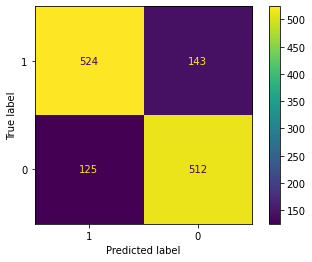

In [78]:
tp, fn, fp, tn = matrix.reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

plot_confusion_matrix(logreg, X_test, y_test, labels=[1,0]) # cmap

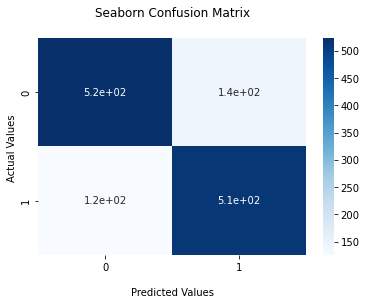

In [49]:
# seaborn
ax = sns.heatmap(matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
# ax.xaxis.set_ticklabels(['False','True'])
# ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

#### Print classification report

In [50]:
## ======== YOUR CODE HERE ======== ##
report = classification_report(y_test, y_test_pred, labels=[1,0])
# report2 = classification_report(y_test, y_test_pred)
print('Classification report : \n', report)
# report

## ================================ ##

Classification report : 
               precision    recall  f1-score   support

           1       0.81      0.79      0.80       667
           0       0.78      0.80      0.79       637

    accuracy                           0.79      1304
   macro avg       0.79      0.79      0.79      1304
weighted avg       0.79      0.79      0.79      1304



#### Print accuracy score

In [51]:
## ======== YOUR CODE HERE ======== ##
accuracy_score(y_test, y_test_pred)

## ================================ ##

0.7944785276073619

In [52]:
accuracy_score(y_train, y_train_pred)
# training par bhi kam accuracy ?

0.7864393016646366

#### Print ROC-AUC score

In [53]:
# predict_proba returns an array of class probabilities (prob for each class)
# The 2 values here represents the prob of being 0 & 1.

y_test_prob = logreg.predict_proba(X_test)
print(y_test_prob.shape)
# y_test_prob

(1304, 2)


In [54]:
## ======== YOUR CODE HERE ======== ##

## Note: Use predict_proba!!! Read documentation/google it
score = roc_auc_score(y_test, y_test_prob[:,1])  # returns area under roc
score
## ================================ ##

0.877197978718647

In [55]:
# without proba ??
roc_score = roc_auc_score(y_test, y_test_pred)
roc_score

0.7946874286561585

#### Plot ROC-AUC Curve

In [56]:
## ======== YOUR CODE HERE ======== ##

## Set appropriate X label, Y label and Title for the graph
fpr, tpr, thresh = roc_curve(y_test, y_test_prob[:,1], pos_label=1)
# pos_label: The label of the positive class.
# print(fpr, tpr)
# thresh 

## ================================ ##

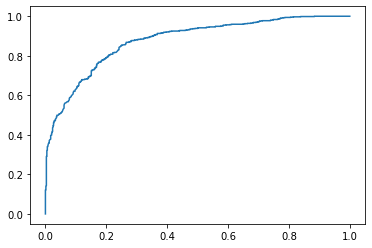

In [57]:
plt.plot(fpr, tpr)
plt.show()

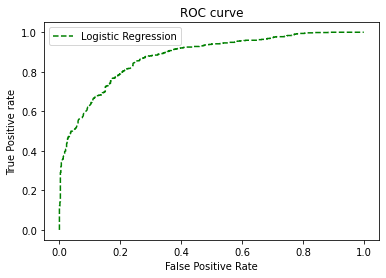

In [58]:
plt.plot(fpr, tpr, linestyle='--',color='green', label='Logistic Regression')

plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show()

#### Cross validation

In [59]:
## ======== YOUR CODE HERE ======== ##

## cv=5 
# on train or test?
cv_score = cross_val_score(logreg, X_train, y_train, cv=5)
# cv: Determines the cross-validation splitting strategy
cv_score

# Returns
# scores : ndarray of float of shape=(len(list(cv)),)
#     Array of scores of the estimator for each run of the cross validation.

## ================================ ##

array([0.78619756, 0.79364005, 0.76792963, 0.80243572, 0.7731889 ])

In [60]:
avrg = np.sum(cv_score) / 5
avrg * 100

78.46783746815171

## <b>SVM</b>
#### Use default parameters unless mentioned

In [61]:
## ======== YOUR CODE HERE ======== ##

## parameters: random_state = 2022, C=5, gamma='scale', kernel='rbf', probability=True
svm = SVC(random_state=2022, C=5, gamma='scale', kernel='rbf', probability=True)
svm.fit(X_train, y_train)

## ================================ ##

SVC(C=5, probability=True, random_state=2022)

In [62]:
# ?
print(svm.class_weight_)
svm.classes_

[1. 1.]


array([0, 1])

#### Plot confusion matrix

[[543 124]
 [131 506]]


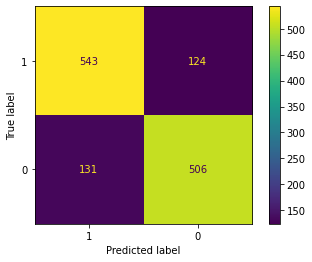

In [63]:
## ======== YOUR CODE HERE ======== ##

## Use display labels as per your choice.
y_test_pred2 = svm.predict(X_test)
matrix2 = confusion_matrix(y_test, y_test_pred2, labels=[1,0])
print(matrix2)

plot_confusion_matrix(svm, X_test, y_test, labels=[1,0])
## ================================ ##

#### Print classification report

In [64]:
## ======== YOUR CODE HERE ======== ##
report2 = classification_report(y_test, y_test_pred2, labels=[1, 0])
print(report2)

## ================================ ##

              precision    recall  f1-score   support

           1       0.81      0.81      0.81       667
           0       0.80      0.79      0.80       637

    accuracy                           0.80      1304
   macro avg       0.80      0.80      0.80      1304
weighted avg       0.80      0.80      0.80      1304



#### Print accuracy score

In [65]:
## ======== YOUR CODE HERE ======== ##
score2 = accuracy_score(y_test, y_test_pred2)
score2
 
## ================================ ##

0.8044478527607362

#### Print ROC-AUC score

In [66]:
y_test_prob2 = svm.predict_proba(X_test)
y_test_prob2.shape

(1304, 2)

In [67]:
## ======== YOUR CODE HERE ======== ##

## Note: Use predict_proba!!! Read documentation/google it
roc_score2 = roc_auc_score(y_test, y_test_prob2[:,1])
roc_score2

## ================================ ##

0.8687238013646239

#### Plot ROC-AUC curve

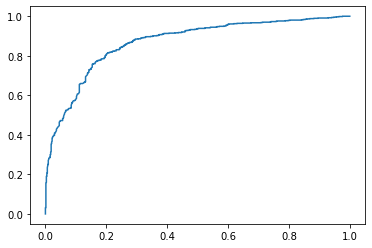

In [68]:
## ======== YOUR CODE HERE ======== ##

## Set appropriate X label, Y label and Title for the graph
fpr2, tpr2, thresh2 = roc_curve(y_test, y_test_prob2[:,1], pos_label=1)

plt.plot(fpr2, tpr2)
plt.show()

## ================================ ##

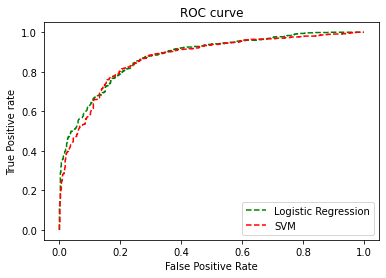

In [69]:
plt.plot(fpr, tpr, linestyle='--',color='green', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='--',color='red', label='SVM')

plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show()

#### Cross validation

In [70]:
## ======== YOUR CODE HERE ======== ##

## cv=5 
cv_score2 = cross_val_score(svm, X_train, y=y_train, cv=5)
print(cv_score2)

# bahut time laga compute hone mein
#DOUBT: Don't know how exactly SVM works

## ================================ ##

[0.79093369 0.78755074 0.76454668 0.80514208 0.77386594]


In [71]:
avrg2 = np.sum(cv_score2)/5
avrg2 * 100

78.44078303037189

# Congratulations! Assignment Completed! 